<a href="https://colab.research.google.com/github/farhaanqazi/F21MP/blob/main/Random_Forest_%2B_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
!pip install pyswarms
from pyswarms.single.global_best import GlobalBestPSO
from pyswarms.discrete.binary import BinaryPSO
import statistics

# Load the dataset
url = 'https://raw.githubusercontent.com/farhaanqazi/F21MP/main/dataset.csv'
df = pd.read_csv(url)

df.drop('Duration', axis=1, inplace=True)
df.drop('ID', axis=1, inplace=True)


# Prepare the data
X = df.drop('PC', axis=1)  # Features
y = df['PC']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the fitness function to evaluate the feature subset
def evaluate_fitness(features):
    # Create a classifier with the selected features
    model = RandomForestClassifier(n_estimators=100, max_depth=5)

    # Get the indices of selected features
    selected_features = np.where(features == 1)[0]


    # Train the classifier
    model.fit(X_train.iloc[:, selected_features], y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test.iloc[:, selected_features])

    # Calculate and return the accuracy score
    return -accuracy_score(y_test, y_pred)  # Negative sign for minimization

# Define the PSO parameters
num_particles = 5
num_iterations = 50

# Define the bounds for each feature
bounds = (0, X.shape[1]-1)  # Assumes all features are selectable

# Define the options
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 2}


# Initialize the optimizer
optimizer = BinaryPSO(n_particles=num_particles, dimensions=X.shape[1], options=options)

# Run PSO to select the best feature subset
best_cost, best_features = optimizer.optimize(evaluate_fitness, iters=num_iterations)

# Print the best feature subset and its corresponding cost
#print("Best Features:", best_features)
#print("Best Cost:", -best_cost)  # Convert back to positive for accuracy

# Train the final model with the selected features
final_model = RandomForestClassifier(n_estimators=100, max_depth=5)
final_model.fit(X_train.iloc[:, best_features], y_train)


2023-08-09 02:07:58,131 - pyswarms.discrete.binary - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|50/50, best_cost=-.723
2023-08-09 02:08:10,486 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -0.7230769230769231, best pos: [1 0 1 1 0 0 0 1 1 0 0 1 1 1 0]


RandomForestClassifier(max_depth=5)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score


# ...

# Train the final model with the selected features
final_model = RandomForestClassifier(n_estimators=100, max_depth=5)
final_model.fit(X_train.iloc[:, best_features], y_train)

# Cross-validation scores
cv_scores = cross_val_score(final_model, X, y, cv=5)
formatted_cv_scores = [f"{score:.4f}" for score in cv_scores]

# Calculate standard deviation
std_dev = statistics.stdev(cv_scores)

# Cross-validation accuracy
cv_accuracy = np.mean(cv_scores)

# Model evaluation metrics
y_train_pred = final_model.predict(X_train.iloc[:, best_features])
y_test_pred = final_model.predict(X_test.iloc[:, best_features])

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
confusion_mat = confusion_matrix(y_test, y_test_pred)
specificity = confusion_mat[0, 0] / (confusion_mat[0, 0] + confusion_mat[0, 1])


#print all the evaluations
print("---------------------")
print("Model:", final_model)
print("---------------------")
print("---------------------")


# Print the best feature subset and its corresponding cost
print("Best Features:", best_features)
print(f"Best Cost: {-best_cost:.4f}")  # Convert back to positive for accuracy
print("---------------------")
print("---------------------")


# Print the evaluation metrics
#print(f"Cross-validation scores: {cv_scores}")
print(f"Cross-validation scores: {', '.join(formatted_cv_scores)}")
print(f"Cross-validation accuracy: {cv_accuracy:.4f}")
print(f"CV Scores Standard deviation:, {std_dev:.4f}")
print("---------------------")
print("---------------------")
print(f"Model Accuracy: {test_accuracy:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


---------------------
Model: RandomForestClassifier(max_depth=5)
---------------------
---------------------
Best Features: [1 0 1 1 0 0 0 1 1 0 0 1 1 1 0]
Best Cost: 0.7231
---------------------
---------------------
Cross-validation scores: 0.5538, 0.7692, 0.6615, 0.7385, 0.7077
Cross-validation accuracy: 0.6862
CV Scores Standard deviation:, 0.0840
---------------------
---------------------
Model Accuracy: 0.6308
Training Accuracy: 0.7000
Testing Accuracy: 0.6308
Precision: 0.6308
Sensitivity: 1.0000
Specificity: 0.0000


In [ ]:
from tabulate import tabulate

# ...

# Define the output data as a list of lists
output_data = [
    ["Model:",  f"{final_model} with Particle Swarm Optimization"],
    ["Best Features:", best_features],
    ["Best Cost:", f"{-best_cost:.4f}"],
    ["Cross-validation scores:", formatted_cv_scores],
    ["CV Scores Standard deviation:", f"{std_dev:.4f}"],
    ["Cross-validation accuracy:", f"{cv_accuracy:.4f}"],
    ["Model Accuracy:", f"{test_accuracy:.4f}"],
    ["Training Accuracy:", f"{train_accuracy:.4f}"],
    ["Testing Accuracy:", f"{test_accuracy:.4f}"],
    ["Precision:", f"{precision:.4f}"],
    ["Sensitivity:", f"{sensitivity:.4f}"],
    ["Specificity:", f"{specificity:.4f}"]
]

# Tabulate the output data
table = tabulate(output_data, headers=["Description", "Value"], tablefmt="fancy_grid")

# Print the table
print(table)


╒═══════════════════════════════╤══════════════════════════════════════════════════════════════════════╕
│ Description                   │ Value                                                                │
╞═══════════════════════════════╪══════════════════════════════════════════════════════════════════════╡
│ Model:                        │ RandomForestClassifier(max_depth=5) with Particle Swarm Optimization │
├───────────────────────────────┼──────────────────────────────────────────────────────────────────────┤
│ Best Features:                │ [1 0 1 1 0 0 0 1 1 0 0 1 1 1 0]                                      │
├───────────────────────────────┼──────────────────────────────────────────────────────────────────────┤
│ Best Cost:                    │ 0.7231                                                               │
├───────────────────────────────┼──────────────────────────────────────────────────────────────────────┤
│ Cross-validation scores:      │ ['0.5538', '0.7692', 

/usr/local/lib/python3.10/dist-packages/tabulate/__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


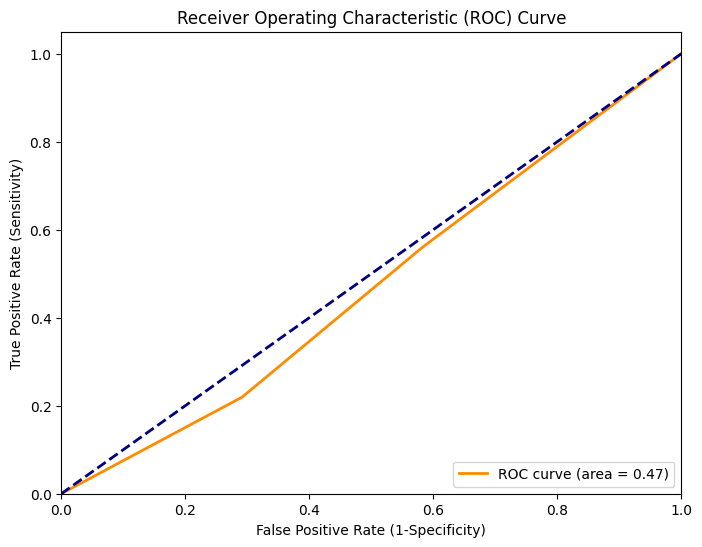

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 5: Make predictions on the test set
y_pred_prob = final_model.predict_proba(X_test.iloc[:, best_features])[:, 1]

# Step 6: Calculate the ROC curve and plot it
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

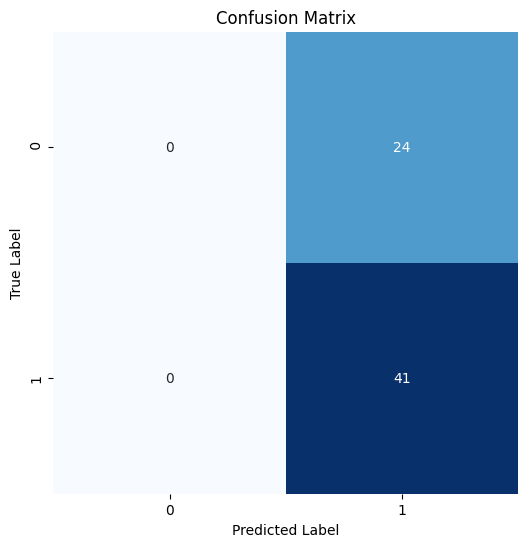

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Compute the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap for visualization
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0", "1"], yticklabels=[" 0", "1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
